In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import scipy.linalg
import scipy.stats
import seaborn as sns

In [19]:
ejemplo = pd.read_csv('movies.csv', encoding = "ISO-8859-1")
print(ejemplo.head())
print(ejemplo.shape)

   id    budget                            genres  \
0   5   4000000                      Crime|Comedy   
1   6  21000000             Action|Thriller|Crime   
2  11  11000000  Adventure|Action|Science Fiction   
3  12  94000000                  Animation|Family   
4  13  55000000              Comedy|Drama|Romance   

                                            homePage  \
0          https://www.miramax.com/movie/four-rooms/   
1                                                NaN   
2  http://www.starwars.com/films/star-wars-episod...   
3              http://movies.disney.com/finding-nemo   
4                                                NaN   

                            productionCompany productionCompanyCountry  \
0                        Miramax|A Band Apart                    US|US   
1  Universal Pictures|Largo Entertainment|JVC                 US|US|JP   
2                  Lucasfilm|20th Century Fox                    US|US   
3                                       Pixar   

In [4]:
ejemplo_num = ejemplo.iloc[:,1:]
ejemplo_num.head()

,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,Allison Anders|Alexandre Rockwell|Robert Rodri...,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,Stephen Hopkins,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,George Lucas,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,Andrew Stanton,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,Robert Zemeckis,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48


## 3.1 Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA, ¿valdrá la pena?


One-Hot Encoding generó 5581 nuevas columnas.
Ejemplo de Frecuencia Encoding:
   genres_freq  productionCompanyCountry_freq  productionCountry_freq
0     0.000704                       0.090826                0.508959
1     0.004122                       0.000459                0.004710
2     0.001307                       0.090826                0.508959
3     0.008746                       0.114335                0.508959
4     0.010656                       0.030390                0.508959
Cardinalidad de Variables Categóricas:
                    Variable  Valores Únicos
0                     genres            2345
1                   homePage            4125
2          productionCompany            8163
3   productionCompanyCountry            2354
4          productionCountry             879
5                      video               2
6                   director            5330
7                     actors            9423
8           actorsPopularity            9855
9            

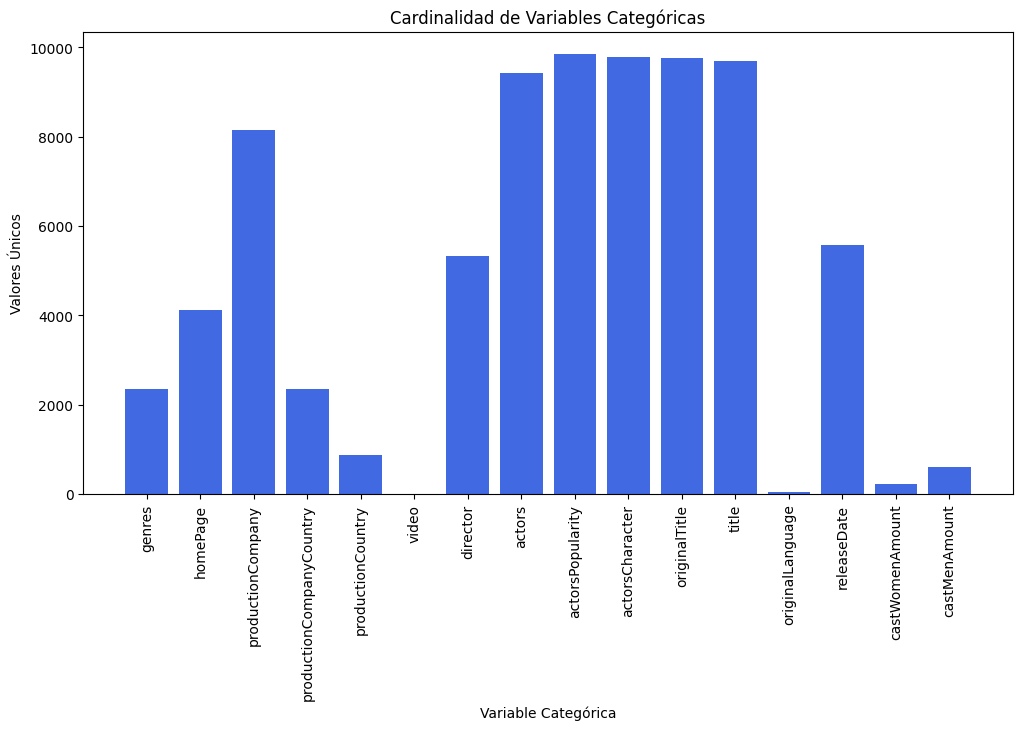

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "movies.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Identificar variables categóricas
categorical_vars = ["genres", "productionCompanyCountry", "productionCountry"]

# ------ One-Hot Encoding ------
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_data = encoder.fit_transform(df[categorical_vars].fillna("Unknown"))
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_vars))

print(f"One-Hot Encoding generó {encoded_df.shape[1]} nuevas columnas.")

# ------ Frecuencia Encoding ------
for col in categorical_vars:
    freq_encoding = df[col].value_counts(normalize=True).to_dict()
    df[f"{col}_freq"] = df[col].map(freq_encoding)

# Seleccionar las nuevas variables generadas con Frecuencia Encoding
freq_encoded_vars = [f"{col}_freq" for col in categorical_vars]
print("Ejemplo de Frecuencia Encoding:")
print(df[freq_encoded_vars].head())

# ------ Calcular Cardinalidad de Variables Categóricas ------
categorical_columns = df.select_dtypes(include=['object']).columns
cardinality = {col: df[col].nunique() for col in categorical_columns}

# Convertir a DataFrame para visualizar
cardinality_df = pd.DataFrame(list(cardinality.items()), columns=["Variable", "Valores Únicos"])

# Mostrar resultados
print("Cardinalidad de Variables Categóricas:")
print(cardinality_df)

# ------ Graficar la Cardinalidad de Variables Categóricas ------
plt.figure(figsize=(12,6))
plt.bar(cardinality_df["Variable"], cardinality_df["Valores Únicos"], color="royalblue")
plt.xlabel("Variable Categórica")
plt.ylabel("Valores Únicos")
plt.title("Cardinalidad de Variables Categóricas")
plt.xticks(rotation=90)
plt.show()

Cardinalidad de Variables Categóricas:
title: 9697 valores únicos
director: 5330 valores únicos
actors: 9423 valores únicos
actorsCharacter: 9796 valores únicos


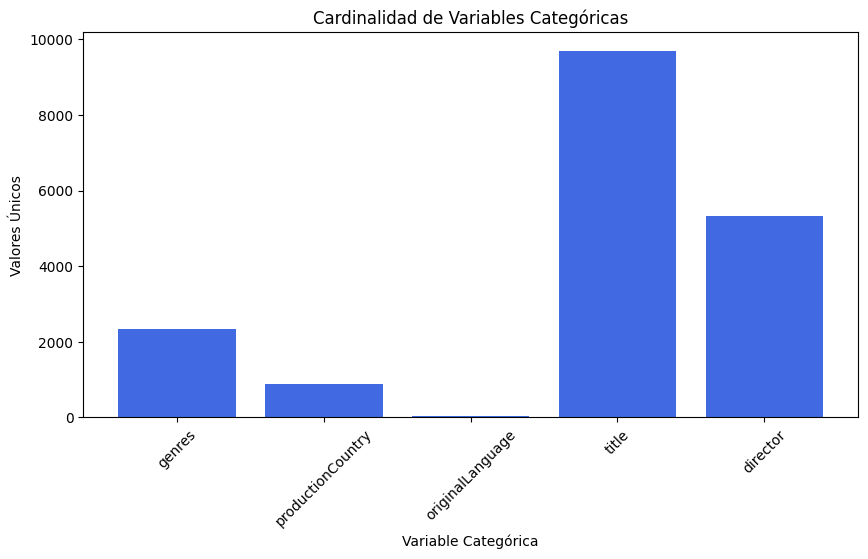

In [8]:
# ------ Calcular Cardinalidad de Variables Categóricas ------
categorical_columns = ["title", "director", "actors", "actorsCharacter"]
cardinality = {col: df[col].nunique() for col in categorical_columns}

# Mostrar resultados
print("Cardinalidad de Variables Categóricas:")
for col, unique_values in cardinality.items():
    print(f"{col}: {unique_values} valores únicos")

# ------ Graficar la Cardinalidad de Variables Categóricas ------
selected_categorical_vars = ["genres", "productionCountry", "originalLanguage", "title", "director"]
cardinality_analysis = {col: df[col].nunique() for col in selected_categorical_vars}
cardinality_df = pd.DataFrame(list(cardinality_analysis.items()), columns=["Variable", "Valores Únicos"])

plt.figure(figsize=(10,5))
plt.bar(cardinality_df["Variable"], cardinality_df["Valores Únicos"], color="royalblue")
plt.xlabel("Variable Categórica")
plt.ylabel("Valores Únicos")
plt.title("Cardinalidad de Variables Categóricas")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Identificar variables categóricas
categorical_vars = ["genres", "productionCompanyCountry", "productionCountry"]

# ------ One-Hot Encoding ------
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_data = encoder.fit_transform(df[categorical_vars].fillna("Unknown"))
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_vars))

print(f"One-Hot Encoding generó {encoded_df.shape[1]} nuevas columnas.")

# ------ Frecuencia Encoding ------
for col in categorical_vars:
    freq_encoding = df[col].value_counts(normalize=True).to_dict()
    df[f"{col}_freq"] = df[col].map(freq_encoding)

# Seleccionar las nuevas variables generadas con Frecuencia Encoding
freq_encoded_vars = [f"{col}_freq" for col in categorical_vars]
print("Ejemplo de Frecuencia Encoding:")
print(df[freq_encoded_vars].head())

# ------ Calcular Cardinalidad de Variables Categóricas ------
categorical_columns = ["title", "director", "actors", "actorsCharacter"]
cardinality = {col: df[col].nunique() for col in categorical_columns}

# Mostrar resultados
print("Cardinalidad de Variables Categóricas:")
for col, unique_values in cardinality.items():
    print(f"{col}: {unique_values} valores únicos")

One-Hot Encoding generó 5581 nuevas columnas.
Ejemplo de Frecuencia Encoding:
   genres_freq  productionCompanyCountry_freq  productionCountry_freq
0     0.000704                       0.090826                0.508959
1     0.004122                       0.000459                0.004710
2     0.001307                       0.090826                0.508959
3     0.008746                       0.114335                0.508959
4     0.010656                       0.030390                0.508959
Cardinalidad de Variables Categóricas:
title: 9697 valores únicos
director: 5330 valores únicos
actors: 9423 valores únicos
actorsCharacter: 9796 valores únicos


## 3.2 Estudie si es conveniente hacer un Análisis de Componentes Principales. Recuerde que puede usar el índice KMO y el test de esfericidad de Bartlett.

In [29]:
chi_cuadrado, p_valor = calculate_bartlett_sphericity(ejemplo_num)
print(f'Valor Chi-cuadrado: {chi_cuadrado}')
print(f'Valor p: {p_valor}')

Valor Chi-cuadrado: 22861.174472130755
Valor p: 0.0


In [30]:
kmo,kmo_modelo = calculate_kmo(ejemplo_num)
print(f'Índice KMO: {kmo_modelo}')

Índice KMO: 0.7131226161072535


In [20]:
# Filtrar solo las columnas numéricas
ejemplo_num = ejemplo.select_dtypes(include=[np.number])

# Revisar si hay valores NaN
if ejemplo_num.isnull().sum().sum() > 0:
    print("El dataset tiene valores NaN, se llenarán con la media de cada columna.")
    ejemplo_num = ejemplo_num.fillna(ejemplo_num.mean())

# Ahora sí ejecutar la prueba de Bartlett
chi_cuadrado, p_valor = calculate_bartlett_sphericity(ejemplo_num)

# Mostrar resultados
print(f'Valor Chi-cuadrado: {chi_cuadrado}')
print(f'Valor p: {p_valor}')

Valor Chi-cuadrado: 22861.174472130755
Valor p: 0.0


In [22]:
kmo,kmo_modelo = calculate_kmo(ejemplo_num)
print(f'Índice KMO: {kmo_modelo}')

Índice KMO: 0.7131226161072535


In [26]:
pca_pipe = make_pipeline(StandardScaler(),PCA()) #Se escalan los datos y luego se le aplica PCA
pca_pipe.fit(ejemplo_num)

#Se extrae el modelo del pipeline
modelo_pca = pca_pipe.named_steps['pca']
print(f'Cantidad de Componentes Generados: {len(modelo_pca.components_)}')


#Se convierte el arreglo en data frame
print("Resultado del PCA:")
pd.DataFrame(
    data = modelo_pca.components_,
    columns = ejemplo_num.columns,
    index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
)

Cantidad de Componentes Generados: 11
Resultado del PCA:


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
PC1,-0.225102,0.501921,0.519759,0.285925,0.119149,0.172720,0.508017,0.160785,0.115109,-0.041302,-0.050841
PC2,0.538927,0.102307,0.197044,-0.298472,0.557324,0.017949,0.112183,-0.142039,-0.277156,-0.020352,0.387630
PC3,0.327944,-0.132510,-0.092215,0.382328,0.240977,0.394636,-0.006707,-0.327441,0.363503,0.434436,-0.279779
PC4,-0.034531,-0.228901,-0.118449,0.183264,-0.020290,0.717354,0.017973,0.067058,-0.379278,-0.484050,0.028472
PC5,0.085539,-0.043718,-0.161717,-0.067952,0.367096,0.079233,-0.175792,0.741038,0.467387,-0.137260,0.040415
PC6,-0.018389,-0.037895,-0.020241,0.096390,-0.365540,0.239213,0.043231,0.145148,0.096957,0.421352,0.766686
PC7,-0.148742,-0.017001,0.006547,-0.143669,0.130108,0.126172,-0.029728,0.395659,-0.549537,0.610670,-0.302849
PC8,-0.437204,-0.024966,-0.166859,0.530497,0.506235,-0.256573,-0.221625,-0.116775,-0.176113,0.013740,0.287919
PC9,0.571219,0.107803,0.036340,0.570629,-0.264966,-0.297023,-0.095203,0.297695,-0.264152,-0.072678,-0.063053
PC10,-0.000810,0.697681,-0.026350,-0.082536,-0.069312,0.255755,-0.649810,-0.114527,-0.008766,-0.006207,-0.005856


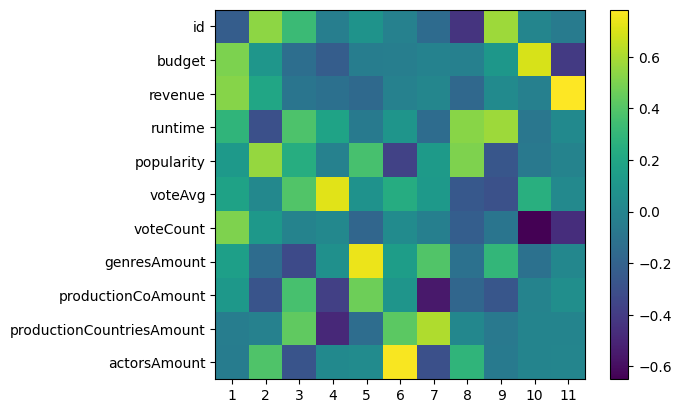

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = modelo_pca.components_
plt.imshow(componentes.T)
plt.yticks(range(len(ejemplo_num.columns)), ejemplo_num.columns)
plt.xticks(range(len(ejemplo_num.columns)), np.arange(modelo_pca.n_components_)+1)
plt.grid(False)
plt.colorbar();

In [27]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.25862531 0.10883742 0.1023966  0.09441796 0.08942156 0.08833715
 0.08388519 0.06992045 0.05858046 0.02891549 0.01666242]


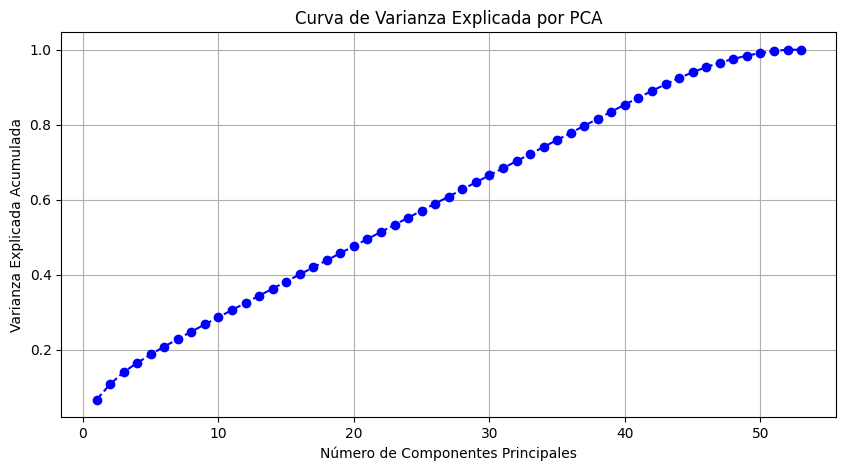

Varianza Explicada por PCA:
    Componente  Varianza Explicada
0            1            0.065981
1            2            0.041185
2            3            0.032547
3            4            0.024427
4            5            0.022756
5            6            0.020617
6            7            0.020540
7            8            0.019760
8            9            0.019230
9           10            0.019159
10          11            0.019119
11          12            0.019070
12          13            0.019026
13          14            0.019004
14          15            0.018970
15          16            0.018958
16          17            0.018939
17          18            0.018922
18          19            0.018916
19          20            0.018907
20          21            0.018905
21          22            0.018901
22          23            0.018895
23          24            0.018891
24          25            0.018885
25          26            0.018883
26          27            0

In [31]:
# Aplicar One-Hot Encoding a originalLanguage (pocas categorías)
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_categorical = encoder.fit_transform(df[["originalLanguage"]].fillna("Unknown"))
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(["originalLanguage"]))

# Aplicar Frecuencia Encoding a genres y productionCountry
for col in ["genres", "productionCountry"]:
    freq_encoding = df[col].value_counts(normalize=True).to_dict()
    df[f"{col}_freq"] = df[col].map(freq_encoding)

# Unir todas las variables para PCA
pca_data = pd.concat([numeric_vars, df[["genres_freq", "productionCountry_freq"]], encoded_categorical_df], axis=1).dropna()

# ----- Normalizar los Datos -----
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# ----- Aplicar PCA -----
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Calcular varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Graficar la varianza explicada por cada componente
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker="o", linestyle="--", color="b")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Curva de Varianza Explicada por PCA")
plt.grid(True)
plt.show()

# Mostrar la tabla con los valores de varianza explicada
explained_variance_df = pd.DataFrame({"Componente": range(1, len(explained_variance) + 1), "Varianza Explicada": explained_variance})
print("Varianza Explicada por PCA:")
print(explained_variance_df)

In [32]:
# Obtener las cargas de los componentes principales (matriz de pesos)
component_loadings = pd.DataFrame(pca.components_, columns=pca_data.columns)

# Mostrar las primeras cargas de los componentes principales
print("Cargas de los primeros 10 Componentes Principales:")
print(component_loadings.head(10))


Cargas de los primeros 10 Componentes Principales:
         id    budget   revenue   runtime  popularity   voteAvg  voteCount  \
0 -0.217459  0.429161  0.424298  0.225177    0.079225  0.089095   0.423264   
1 -0.044912 -0.122655 -0.159932 -0.237170   -0.080335 -0.298923  -0.156770   
2  0.110853  0.043051  0.097189  0.189798    0.024265  0.039292   0.123899   
3  0.381884  0.125765  0.237001 -0.245679    0.431523  0.123871   0.155810   
4  0.250476  0.147175  0.060365 -0.180098    0.209128 -0.381194  -0.013519   
5 -0.201307  0.076536  0.068586  0.074949   -0.235538 -0.171972   0.002656   
6 -0.243177  0.078244  0.117932 -0.309052   -0.147516 -0.007009   0.120941   
7 -0.032269  0.089918  0.070606 -0.061768    0.025529 -0.278652   0.001842   
8  0.007909  0.017192  0.009670 -0.051270   -0.091670  0.026395   0.015628   
9 -0.030210  0.015935  0.023715  0.014602    0.093128 -0.009934  -0.012113   

   genresAmount  productionCoAmount  productionCountriesAmount  ...  \
0      0.138481    